### FOBSS Preprocessing Script
---
Playground for data visualization

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage 

def subsample(sequence, d_sample):
    return sequence[::d_sample]

def smooth(sequence, sigma):
    return ndimage.filters.gaussian_filter(sequence, sigma)

subsample_fac = 1
smooth_fac = 15

## Voltage

Text(0.5, 1.0, 'Complex')

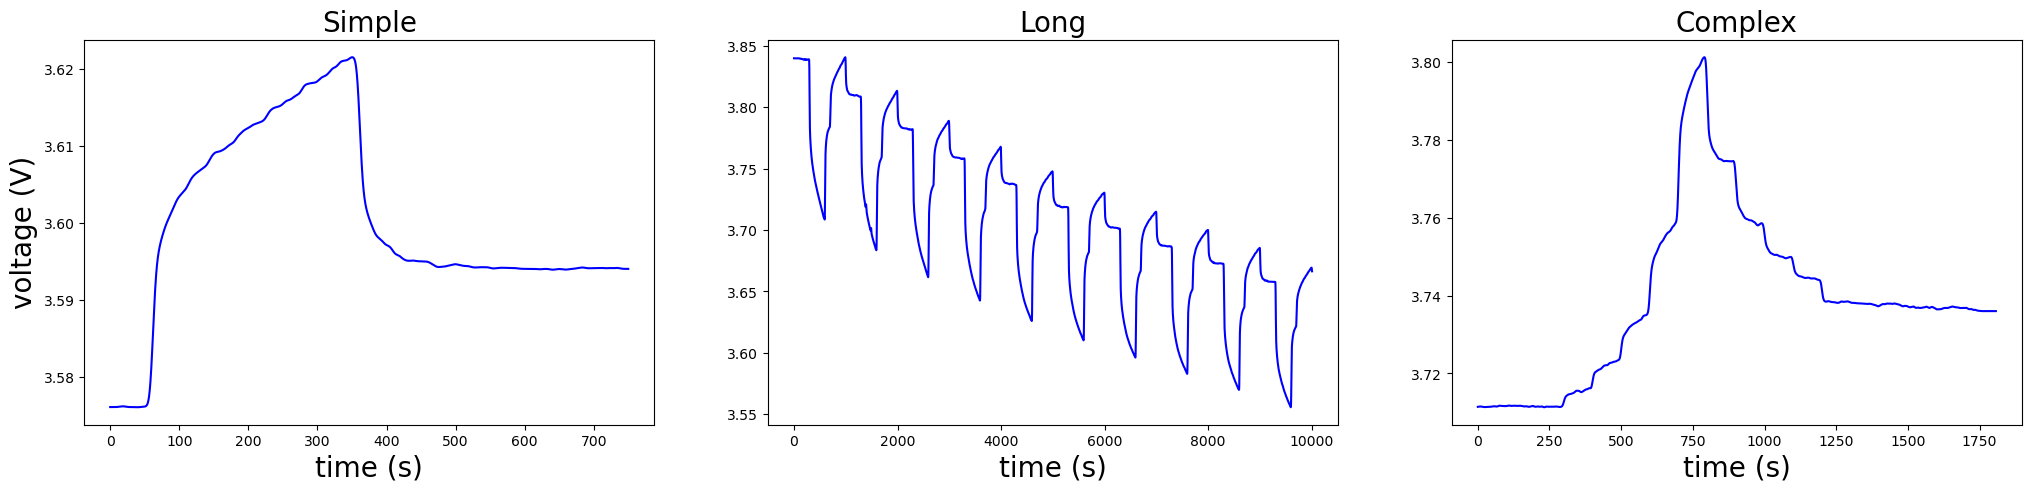

In [79]:
fig,_ = plt.subplots(figsize=(25,5))

# simple
axe = plt.subplot(1,3,1)
volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
plt.ylabel("voltage (V)", fontsize=20)
plt.xlabel("time (s)", fontsize=20)
plt.title("Simple", fontsize=20)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b')

# long
axe = plt.subplot(1,3,2)
volt = np.loadtxt('../../data/raw/fobss_data/data/profile_-25A_10A_04_12_18/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
plt.xlabel("time (s)", fontsize=20)
plt.title("Long", fontsize=20)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b')

# complex
axe = plt.subplot(1,3,3)
volt = np.loadtxt('../../data/raw/fobss_data/data/stairs_19_11_18/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b')
plt.xlabel("time (s)", fontsize=20)
plt.title("Complex", fontsize=20)

## Current

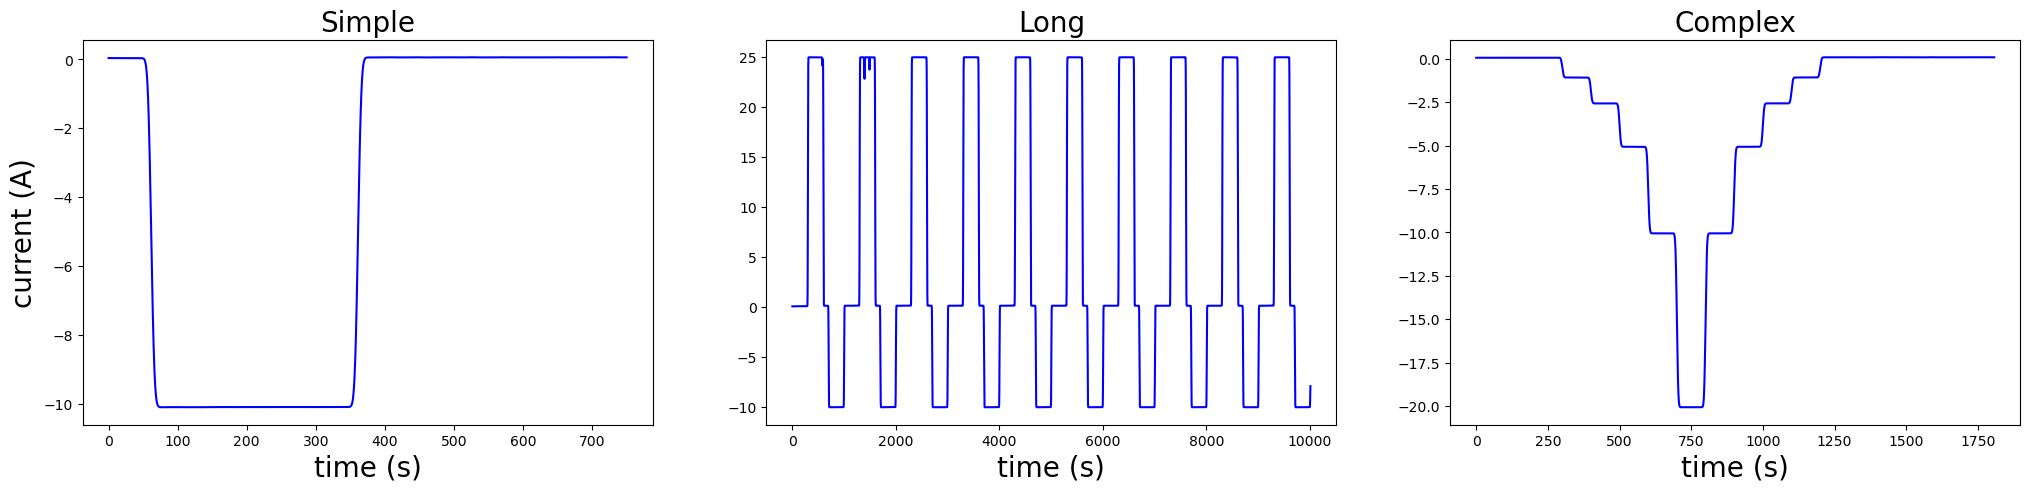

In [80]:
fig,_ = plt.subplots(figsize=(25,5))

# simple
axe = plt.subplot(1,3,1)
cur = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A/battery/Battery_Current.csv', delimiter=';')
cur = cur[:,1]
cur = subsample(cur, subsample_fac)
cur = smooth(cur, smooth_fac)
plt.ylabel("current (A)", fontsize=20)
plt.xlabel("time (s)", fontsize=20)
plt.title("Simple", fontsize=20)
size = cur.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, cur, color='b')

# long
axe = plt.subplot(1,3,2)
cur = np.loadtxt('../../data/raw/fobss_data/data/profile_-25A_10A_04_12_18/battery/Battery_Current.csv', delimiter=';')
cur = cur[:,1]
cur = subsample(cur, subsample_fac)
cur = smooth(cur, smooth_fac)
plt.xlabel("time (s)", fontsize=20)
plt.title("Long", fontsize=20)
size = cur.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, cur, color='b')

# complex
axe = plt.subplot(1,3,3)
cur = np.loadtxt('../../data/raw/fobss_data/data/stairs_19_11_18/battery/Battery_Current.csv', delimiter=';')
cur = cur[:,1]
cur = subsample(cur, subsample_fac)
cur = smooth(cur, smooth_fac)
plt.xlabel("time (s)", fontsize=20)
plt.title("Complex", fontsize=20)
size = cur.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, cur, color='b')


Relationship between current and charge


Text(0.5, 0, 'time (s)')

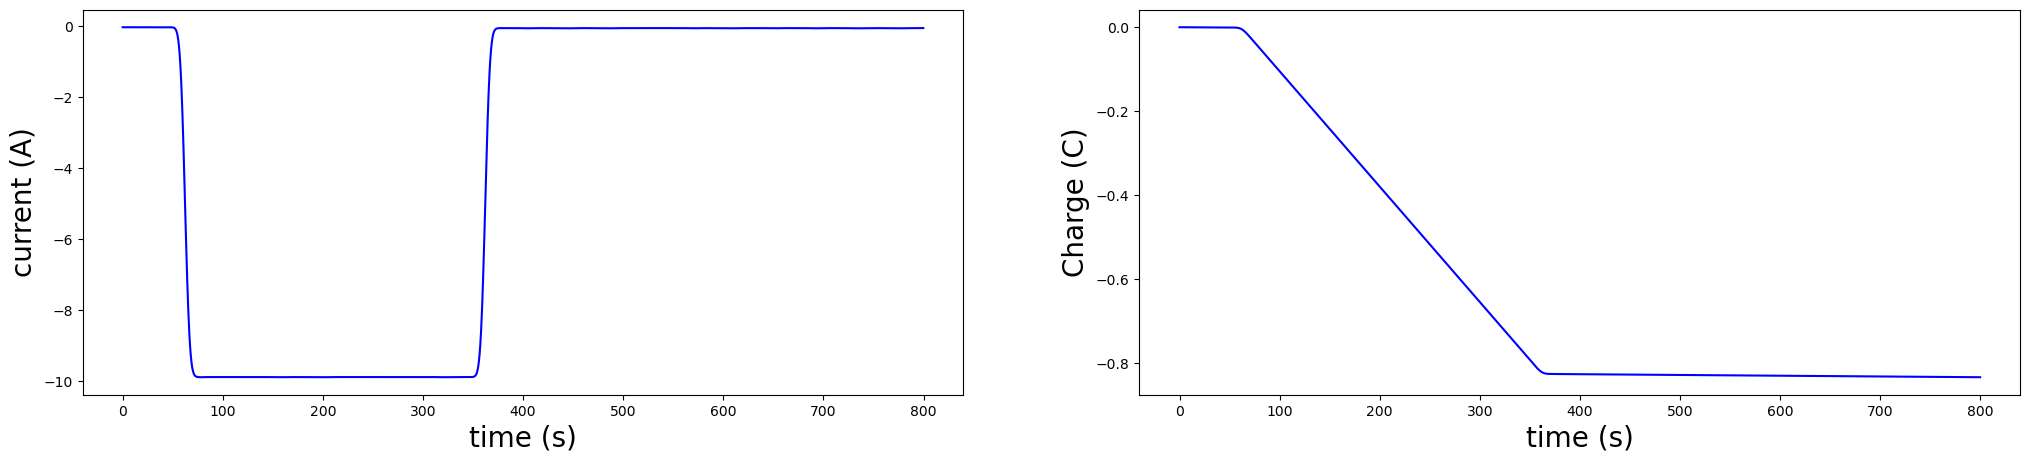

In [81]:
cur = np.loadtxt('../../data/raw/fobss_data/data/Profile -10A/battery/Battery_Current.csv', delimiter=';')
cur = -cur[:,1]
cur = subsample(cur, subsample_fac)
cur = smooth(cur, smooth_fac)

charge_raw = []
q_t = 0
for j in range(len(cur)):
    q_t += cur[j] * (0.25 * 1)  / 3600
    charge_raw.append(q_t)
    
size = cur.shape[0] * subsample_fac

fig,_ = plt.subplots(figsize=(25,5))

axe = plt.subplot(1,2,1)
plt.plot(np.arange(size)[::subsample_fac]*0.25, cur, color='b')
plt.ylabel("current (A)", fontsize=20)
plt.xlabel("time (s)", fontsize=20)

axe = plt.subplot(1,2,2)
plt.plot(np.arange(size)[::subsample_fac]*0.25, charge_raw, color='b')
plt.ylabel("Charge (C)", fontsize=20)
plt.xlabel("time (s)", fontsize=20)

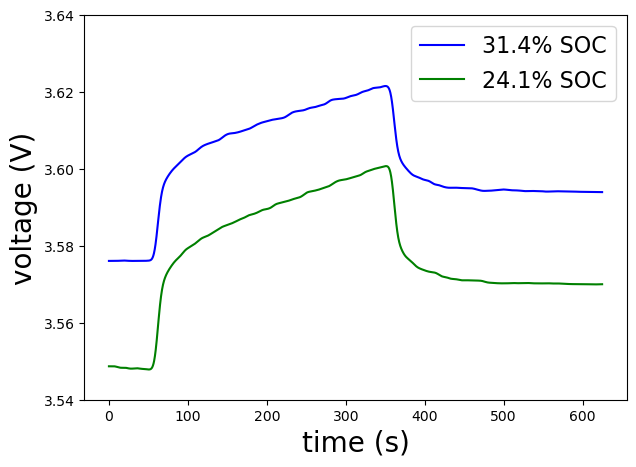

In [82]:
fig,_ = plt.subplots(figsize=(7,5))
axe = plt.subplot(1,1,1)
axe.set_ylim(3.54, 3.64)

volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b', label='31.4% SOC')
volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A Run 070618/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)

plt.plot(np.arange(volt.shape[0] * subsample_fac)[::subsample_fac]*0.25, volt, color='g', label='24.1% SOC')
plt.xlabel("time (s)", fontsize=20)
plt.ylabel("voltage (V)", fontsize=20)
plt.legend(prop={"size":16})

Differences between various runs (always slave no. 4)

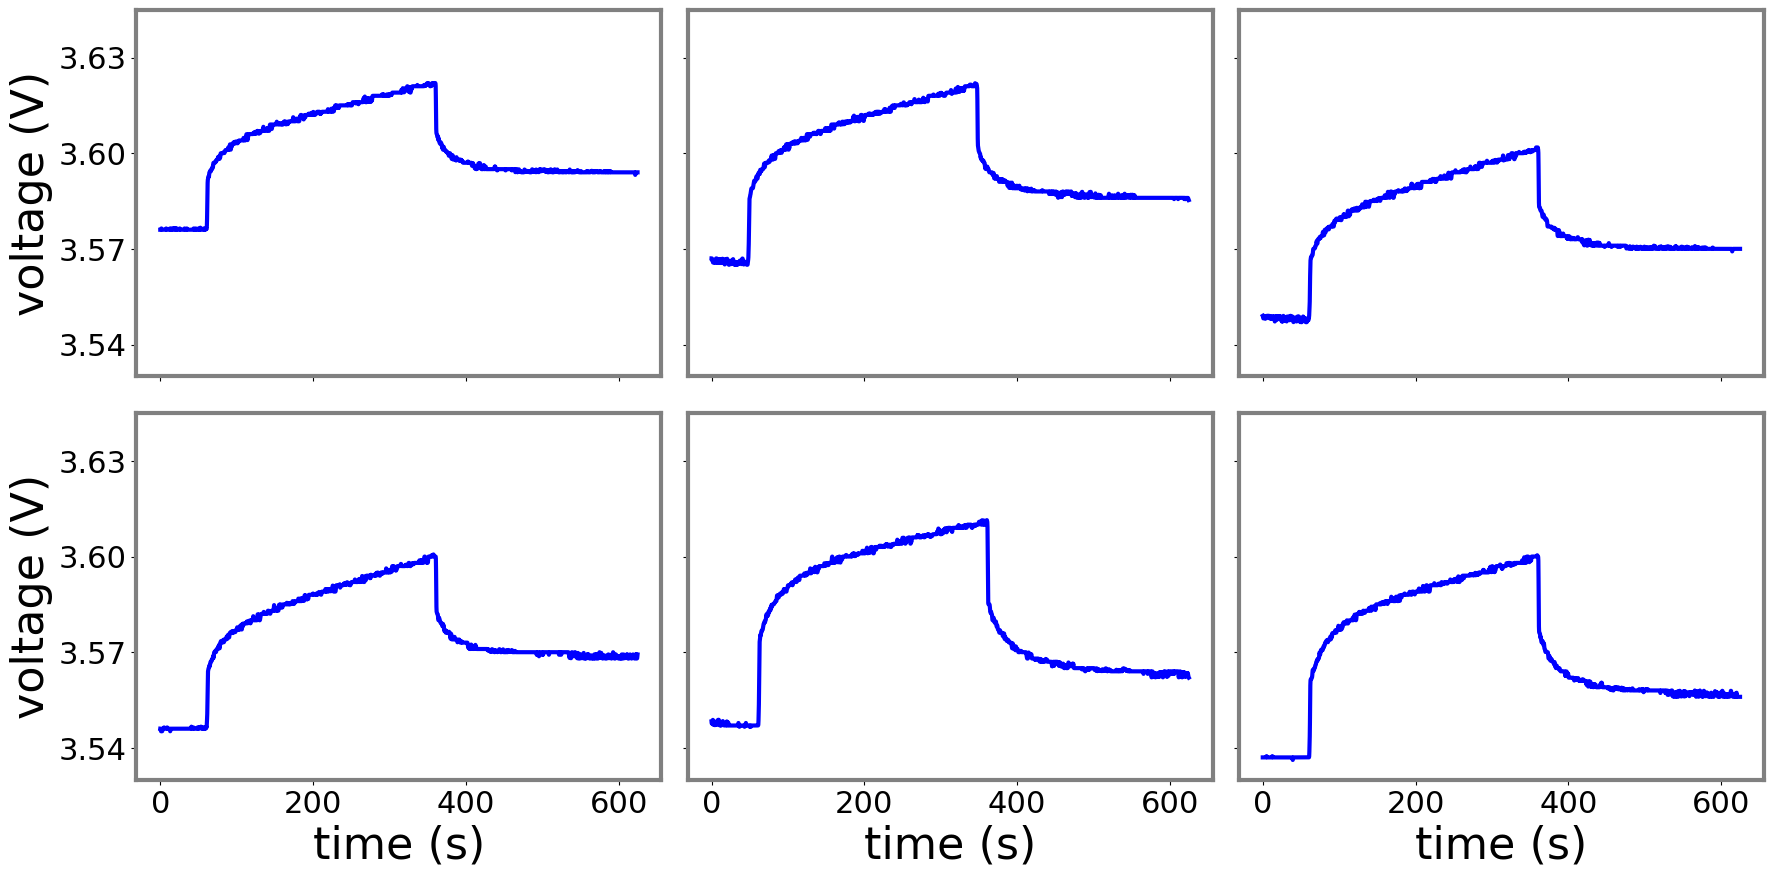

In [101]:
fig,_ = plt.subplots(figsize=(21,10))

fontsize = 32
tick_fontsize = 22
linewidth = 3
plotwidth = 3

axe = plt.subplot(2,3,1)
axe.set_ylim(3.53, 3.645)
axe.xaxis.set_ticklabels([])
volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
plt.ylabel("voltage (V)", fontsize=fontsize)
plt.yticks(fontsize=tick_fontsize)
#plt.xlabel("time (s)", fontsize=fontsize)
size = volt.shape[0] * subsample_fac
axe.xaxis.set_major_locator(plt.MaxNLocator(4))
axe.yaxis.set_major_locator(plt.MaxNLocator(4))
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b', linewidth=plotwidth)
for pos in ['top', 'bottom', 'right', 'left']:
    axe.spines[pos].set_edgecolor("grey")
    axe.spines[pos].set_linewidth(linewidth)


axe = plt.subplot(2,3,2)
axe.set_ylim(3.53, 3.645)
axe.xaxis.set_ticklabels([])
axe.yaxis.set_ticklabels([])
volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A Run 040618/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b', linewidth=plotwidth)
#plt.ylabel("voltage (V)", fontsize=fontsize)
#plt.xlabel("time (s)", fontsize=fontsize)
axe.xaxis.set_major_locator(plt.MaxNLocator(4))
axe.yaxis.set_major_locator(plt.MaxNLocator(4))
for pos in ['top', 'bottom', 'right', 'left']:
    axe.spines[pos].set_edgecolor("grey")
    axe.spines[pos].set_linewidth(linewidth)

axe = plt.subplot(2,3,3)
axe.set_ylim(3.53, 3.645)
axe.xaxis.set_ticklabels([])
axe.yaxis.set_ticklabels([])
volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A Run 070618/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b', linewidth=plotwidth)
#plt.ylabel("voltage (V)", fontsize=fontsize)
#plt.xlabel("time (s)", fontsize=fontsize)
axe.xaxis.set_major_locator(plt.MaxNLocator(4))
axe.yaxis.set_major_locator(plt.MaxNLocator(4))
for pos in ['top', 'bottom', 'right', 'left']:
    axe.spines[pos].set_edgecolor("grey")
    axe.spines[pos].set_linewidth(linewidth)


axe = plt.subplot(2,3,4)
axe.set_ylim(3.53, 3.645)
volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A Run 070618_2/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b', linewidth=plotwidth)
plt.ylabel("voltage (V)", fontsize=fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.xlabel("time (s)", fontsize=fontsize)
plt.xticks(fontsize=tick_fontsize)
axe.xaxis.set_major_locator(plt.MaxNLocator(4))
axe.yaxis.set_major_locator(plt.MaxNLocator(4))
for pos in ['top', 'bottom', 'right', 'left']:
    axe.spines[pos].set_edgecolor("grey")
    axe.spines[pos].set_linewidth(linewidth)


axe = plt.subplot(2,3,5)
axe.set_ylim(3.53, 3.645)
axe.yaxis.set_ticklabels([])
volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A Run 080618/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
#plt.ylabel("voltage (V)", fontsize=fontsize)
plt.xlabel("time (s)", fontsize=fontsize)
plt.xticks(fontsize=tick_fontsize)
size = volt.shape[0] * subsample_fac
axe.xaxis.set_major_locator(plt.MaxNLocator(4))
axe.yaxis.set_major_locator(plt.MaxNLocator(4))
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b', linewidth=plotwidth)
for pos in ['top', 'bottom', 'right', 'left']:
    axe.spines[pos].set_edgecolor("grey")
    axe.spines[pos].set_linewidth(linewidth)



axe = plt.subplot(2,3,6)
axe.set_ylim(3.53, 3.645)
axe.yaxis.set_ticklabels([])
volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A Run 080618_3/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b', linewidth=plotwidth)
#plt.ylabel("voltage (V)", fontsize=fontsize)
plt.xlabel("time (s)", fontsize=fontsize)
plt.xticks(fontsize=tick_fontsize)
axe.xaxis.set_major_locator(plt.MaxNLocator(4))
axe.yaxis.set_major_locator(plt.MaxNLocator(4))
for pos in ['top', 'bottom', 'right', 'left']:
    axe.spines[pos].set_edgecolor("grey")
    axe.spines[pos].set_linewidth(linewidth)



fig.subplots_adjust(wspace=0.05, hspace=0.1)

plt.savefig('train_profilies2.pdf', bbox_inches='tight')  

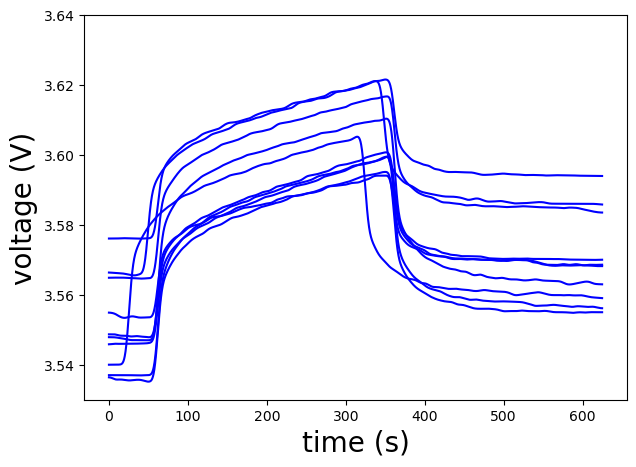

In [84]:
fig,_ = plt.subplots(figsize=(7,5))

axe = plt.subplot(1,1,1)
axe.set_ylim(3.53, 3.64)
volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A/cells/Slave_0_Cell_Voltages.csv', delimiter=';')

volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
plt.ylabel("voltage (V)", fontsize=20)
plt.xlabel("time (s)", fontsize=20)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b')

volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A Run 040618/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b')


volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A Run 040618_2/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b')


volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A Run 070618/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b')


volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A Run 070618_2/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b')


volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A Run 070618_3/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
plt.xlabel("time (s)", fontsize=20)
plt.ylabel("voltage (V)", fontsize=20)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b')

volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A Run 080618/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
plt.xlabel("time (s)", fontsize=20)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b')

volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A Run 080618_2/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
plt.xlabel("time (s)", fontsize=20)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b')

volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A Run 080618_3/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
plt.xlabel("time (s)", fontsize=20)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b')

volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A Run 080618_4/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
plt.xlabel("time (s)", fontsize=20)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b')


Three types of experiments

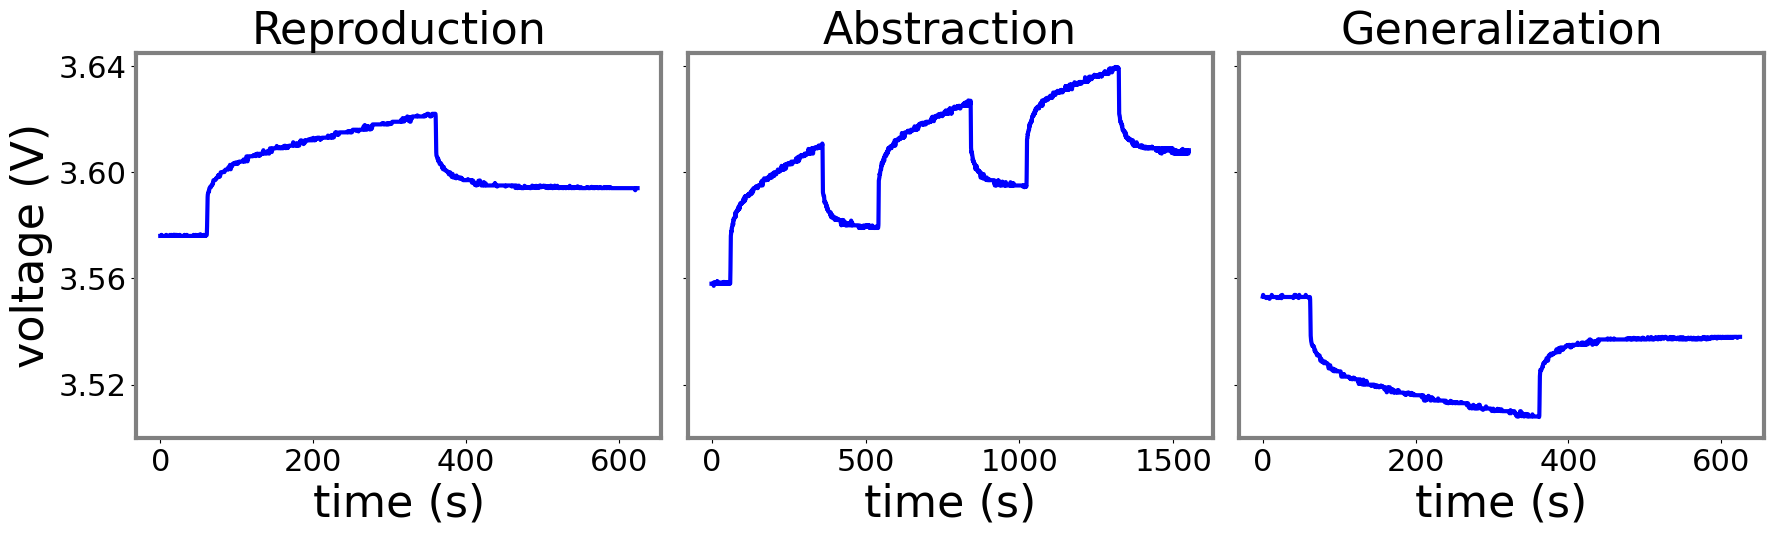

In [95]:
fig,_ = plt.subplots(figsize=(21,5))

fontsize = 32
tick_fontsize = 22
linewidth = 3
plotwidth = 3

axe = plt.subplot(1,3,1)
axe.set_ylim(3.5, 3.645)
volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
plt.ylabel("voltage (V)", fontsize=fontsize)
plt.title("Reproduction", fontsize=fontsize)
plt.xlabel("time (s)", fontsize=fontsize)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b', linewidth=plotwidth)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
axe.xaxis.set_major_locator(plt.MaxNLocator(4))
axe.yaxis.set_major_locator(plt.MaxNLocator(4))
for pos in ['top', 'bottom', 'right', 'left']:
    axe.spines[pos].set_edgecolor("grey")
    axe.spines[pos].set_linewidth(linewidth)


axe = plt.subplot(1,3,2)
axe.set_ylim(3.5, 3.645)
axe.yaxis.set_ticklabels([])
volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A 3x/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b', linewidth=plotwidth)
#plt.ylabel("voltage (V)", fontsize=fontsize)
plt.title("Abstraction", fontsize=fontsize)
plt.xticks(fontsize=tick_fontsize)
axe.xaxis.set_major_locator(plt.MaxNLocator(4))
axe.yaxis.set_major_locator(plt.MaxNLocator(4))
for pos in ['top', 'bottom', 'right', 'left']:
    axe.spines[pos].set_edgecolor("grey")
    axe.spines[pos].set_linewidth(linewidth)


plt.xlabel("time (s)", fontsize=fontsize)

axe = plt.subplot(1,3,3)
axe.set_ylim(3.5, 3.645)
axe.yaxis.set_ticklabels([])
volt = np.loadtxt('../../data/raw/fobss_data/data/Profile -10A/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b', linewidth=plotwidth)
#plt.ylabel("voltage (V)", fontsize=fontsize)
plt.xlabel("time (s)", fontsize=fontsize)
plt.title("Generalization", fontsize=fontsize)
plt.xticks(fontsize=tick_fontsize)
axe.xaxis.set_major_locator(plt.MaxNLocator(4))
axe.yaxis.set_major_locator(plt.MaxNLocator(4))
for pos in ['top', 'bottom', 'right', 'left']:
    axe.spines[pos].set_edgecolor("grey")
    axe.spines[pos].set_linewidth(linewidth)

fig.subplots_adjust(wspace=0.05, hspace=0.1)

plt.savefig('test_profiles.pdf', bbox_inches='tight')  



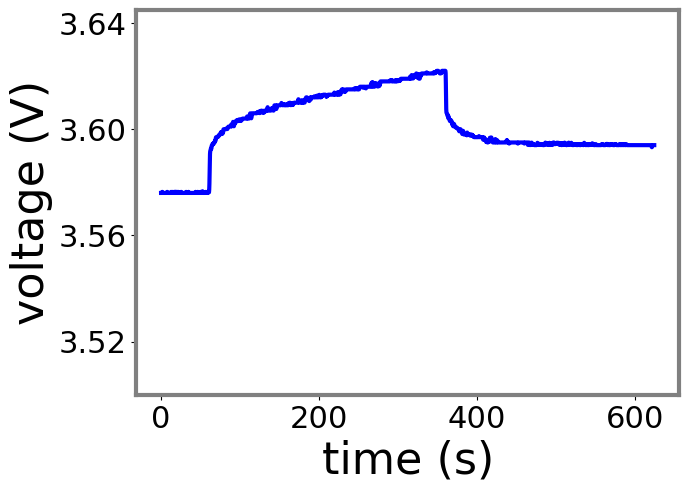

In [98]:
fig,_ = plt.subplots(figsize=(7,5))

fontsize = 32
tick_fontsize = 22
linewidth = 3
plotwidth = 3

axe = plt.subplot(1,1,1)
axe.set_ylim(3.5, 3.645)
volt = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt = volt[:,4]
volt = volt[:2500]
volt = subsample(volt, subsample_fac)
volt = smooth(volt, smooth_fac)
plt.ylabel("voltage (V)", fontsize=fontsize)
plt.xlabel("time (s)", fontsize=fontsize)
size = volt.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, volt, color='b', linewidth=plotwidth)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
axe.xaxis.set_major_locator(plt.MaxNLocator(4))
axe.yaxis.set_major_locator(plt.MaxNLocator(4))
for pos in ['top', 'bottom', 'right', 'left']:
    axe.spines[pos].set_edgecolor("grey")
    axe.spines[pos].set_linewidth(linewidth)

fig.subplots_adjust(wspace=0.05, hspace=0.1)
plt.savefig('voltage_output.png', bbox_inches='tight')  



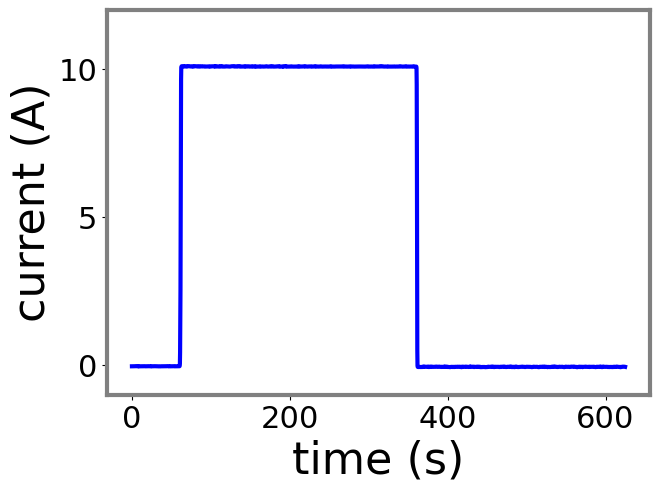

In [99]:
fig,_ = plt.subplots(figsize=(7,5))

fontsize = 32
tick_fontsize = 22
linewidth = 3
plotwidth = 3

axe = plt.subplot(1,1,1)
axe.set_ylim(-1, 12)
smooth_fac = 1

cur = np.loadtxt('../../data/raw/fobss_data/data/Profile 10A/battery/Battery_Current.csv', delimiter=';')
cur = -cur[:,1]
cur = cur[:2500]
cur = subsample(cur, subsample_fac)
cur = smooth(cur, smooth_fac)

plt.ylabel("current (A)", fontsize=fontsize)
plt.xlabel("time (s)", fontsize=fontsize)
size = cur.shape[0] * subsample_fac
plt.plot(np.arange(size)[::subsample_fac]*0.25, cur, color='b', linewidth=plotwidth)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
axe.xaxis.set_major_locator(plt.MaxNLocator(4))
axe.yaxis.set_major_locator(plt.MaxNLocator(3))
for pos in ['top', 'bottom', 'right', 'left']:
    axe.spines[pos].set_edgecolor("grey")
    axe.spines[pos].set_linewidth(linewidth)

fig.subplots_adjust(wspace=0.05, hspace=0.1)
plt.savefig('current_input.png', bbox_inches='tight')  
